In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("WebsiteData.csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [12]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns =["Channerl Group","DateHour","Users","Session","Engaged Sessions","Average engagement time per session",
            "Engaged sessions per user",
             "Events per session","Engagement rate","Event count"
            ]
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
1,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
2,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
3,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
4,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channerl Group                       3180 non-null   object
 1   DateHour                             3180 non-null   object
 2   Users                                3180 non-null   object
 3   Session                              3180 non-null   object
 4   Engaged Sessions                     3180 non-null   object
 5   Average engagement time per session  3180 non-null   object
 6   Engaged sessions per user            3180 non-null   object
 7   Events per session                   3180 non-null   object
 8   Engagement rate                      3180 non-null   object
 9   Event count                          3180 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [14]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H",errors='coerce')
numeric_cols = df.columns.drop(["Channerl Group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["DateHour"].dt.hour

In [15]:
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channerl Group                       3180 non-null   object        
 1   DateHour                             3180 non-null   datetime64[ns]
 2   Users                                3180 non-null   int64         
 3   Session                              3180 non-null   int64         
 4   Engaged Sessions                     3180 non-null   int64         
 5   Average engagement time per session  3180 non-null   float64       
 6   Engaged sessions per user            3180 non-null   float64       
 7   Events per session                   3180 non-null   float64       
 8   Engagement rate                      3180 non-null   float64       
 9   Event count                          3180 non-null   int64         
 10  Hour        

In [17]:
df.describe()

,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3180,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,2024-04-20 01:19:32.830188800,41.822327,51.046541,28.256604,66.661457,0.606440,4.676089,0.503406,241.623270,11.801258
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.105625,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:30:00,42.000000,51.000000,27.000000,49.068279,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.509259,0.750000,5.218581,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,188.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.240446,36.466375,20.472406,127.238737,0.264105,2.796099,0.228277,182.643504,6.884807


In [18]:
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


# sessions and user overtime

In [19]:
sns.set(style="whitegrid")

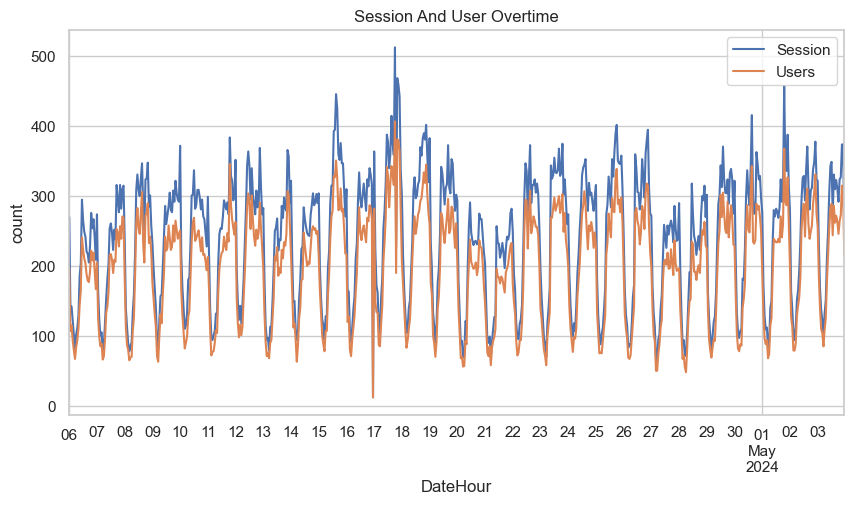

In [23]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.title("Session And User Overtime")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

In [24]:
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


# total users by channel

In [29]:
df.groupby("Channerl Group")["Users"].sum()

Channerl Group
Direct            29805
Email                 2
Organic Search    28387
Organic Social    47364
Organic Video       123
Referral          26774
Unassigned          540
Name: Users, dtype: int64

C:\Users\Prince Bhindi\AppData\Local\Temp\ipykernel_21732\2795835924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channerl Group",y="Users", estimator=np.sum,palette="viridis")


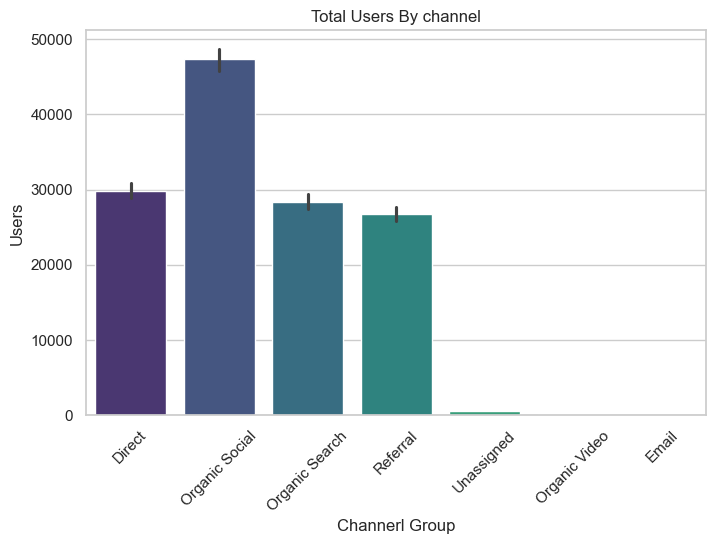

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channerl Group",y="Users", estimator=np.sum,palette="viridis")
plt.title("Total Users By channel")
plt.xticks(rotation=45)
plt.show()

# Avg Engagement time by channel

C:\Users\Prince Bhindi\AppData\Local\Temp\ipykernel_21732\2875337040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channerl Group",y="Average engagement time per session", estimator=np.mean,palette="magma")


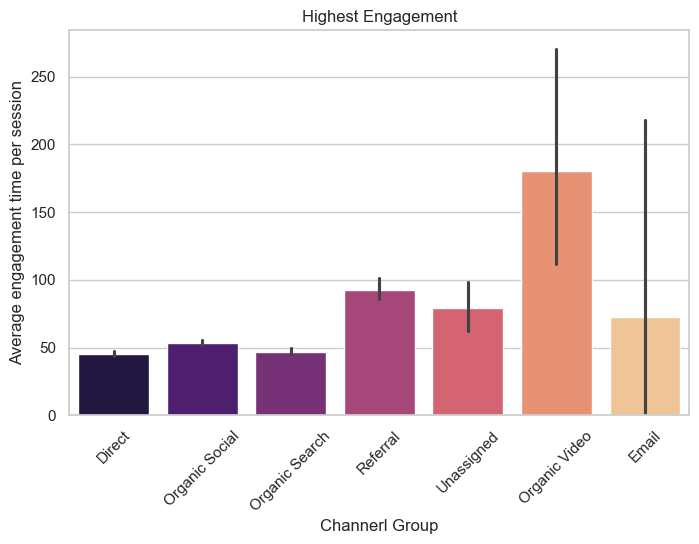

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channerl Group",y="Average engagement time per session", estimator=np.mean,palette="magma")
plt.title("Highest Engagement")
plt.xticks(rotation=45)
plt.show()

In [35]:
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


# EngageMentRate Distribution By Channel

C:\Users\Prince Bhindi\AppData\Local\Temp\ipykernel_21732\1671408086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Channerl Group",y="Engagement rate", palette="coolwarm")


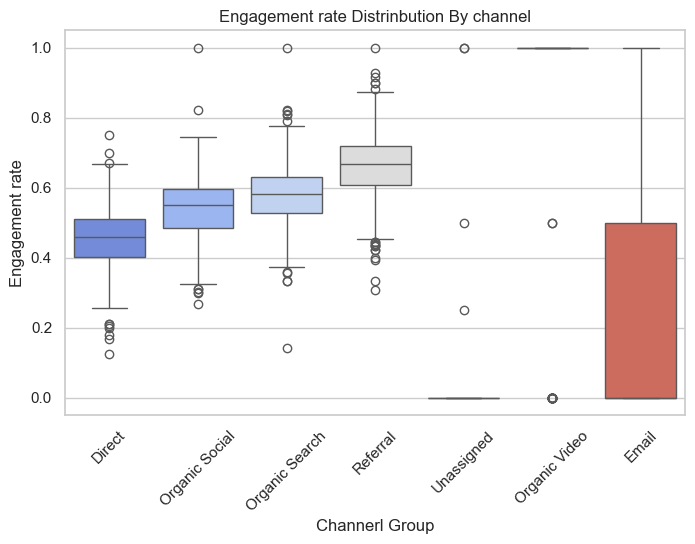

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Channerl Group",y="Engagement rate", palette="coolwarm")
plt.title("Engagement rate Distrinbution By channel")
plt.xticks(rotation=45)
plt.show()

# Engage Vs Non Engage Sessions

In [41]:
df.head()

,Channerl Group,DateHour,Users,Session,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
